# FOST-- Save And Load Model

> Here's wind power data of a certain windmill. It contains various weather, turbine and rotor features. Data has been recorded from January 2018 till March 2020.</br>
Link:https://www.kaggle.com/theforcecoder/wind-power-forecasting

We are going to use FOST and Wind Power data to predict next several minutes. Also, we will experience saving the trained model for reuse directly next time without training again.

In [1]:
import fostool
from fostool.pipeline import Pipeline

# Download Data

- If you have already downloaded data before, no need to run this block.

You should have `FOST_example_data/Energy/graph.csv`,`FOST_example_data/Energy/train.csv` and `FOST_example_data/Turbine/train.csv` after running this block.

In [2]:
!wget -O Dataset.zip "https://onedrive.live.com/download?cid=4E3B5BF06F46DFD5&resid=4E3B5BF06F46DFD5%21461&authkey=ACK4NyYumsXm8IY"

!unzip Dataset.zip

--2021-11-11 14:56:34--  https://onedrive.live.com/download?cid=4E3B5BF06F46DFD5&resid=4E3B5BF06F46DFD5%21461&authkey=ACK4NyYumsXm8IY
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ife64g.dm.files.1drv.com/y4m7cqy1MEaGnkkMJAd_OBMaVrnd0rtJLpI-CukA6Pk_CdG12uy6_SVVTRXjrlOXEqCas7CFb-ch-EDE8ngwMry7lXZpnHrGbX8kIOckyrhYskiKJtsmkhftzFWX1aa275feoZInpwaG2WGXQ_9N9r3Gr-yYQ2186K2L6t4k44AdZS0p3MpjV_flogsG0gfGYbvW6Rf0I02MpfXOvrFUTBowQ/FOST_example_data.zip?download&psid=1 [following]
--2021-11-11 14:56:35--  https://ife64g.dm.files.1drv.com/y4m7cqy1MEaGnkkMJAd_OBMaVrnd0rtJLpI-CukA6Pk_CdG12uy6_SVVTRXjrlOXEqCas7CFb-ch-EDE8ngwMry7lXZpnHrGbX8kIOckyrhYskiKJtsmkhftzFWX1aa275feoZInpwaG2WGXQ_9N9r3Gr-yYQ2186K2L6t4k44AdZS0p3MpjV_flogsG0gfGYbvW6Rf0I02MpfXOvrFUTBowQ/FOST_example_data.zip?download&psid=1
Resolving ife64g.dm.files.1drv.com (ife64g.

# Preparing Data

Load the training data from the .csv file, and set `lookahead` to 1000 minites.

In [3]:
train_path = 'FOST_example_data/Turbine/train.csv'
graph_path = None # graph is not exist in this case

#predict for next 1000 minutes
lookahead = 1000

In [4]:
import pandas as pd
pd.read_csv(train_path).head() #you could see there are many missing values

,Date,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,Node,WindDirection,TARGET
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


# Create Pipeline

Create Pipeline and preprocess training data, you are encouraged to change params like `lookahead`.

In [6]:
fost = Pipeline(lookahead=lookahead, train_path=train_path)

2021-11-10 16:20:29 fostool/task/config_handler.py 26 \ - INFO - yaml handler load path: /home/xiaofan/anaconda3/envs/test/lib/python3.8/site-packages/fostool/config/default.yaml
2021-11-10 16:20:30 fostool/dataset/data_utils.py 402 \ - INFO - Detected Sample Frequency: <10 * Minutes>.
2021-11-10 16:20:30 fostool/dataset/data_utils.py 426 \ - INFO - 118224 Rows Before Time Reindex.
2021-11-10 16:20:31 fostool/dataset/data_utils.py 428 \ - INFO - 118224 Rows After Time Reindex.
2021-11-10 16:20:31 fostool/dataset/data_utils.py 429 \ - INFO - --------------------
2021-11-10 16:20:31 fostool/dataset/data_utils.py 457 \ - INFO - 118224 Rows Before Fill Missing.
2021-11-10 16:20:34 fostool/dataset/data_utils.py 461 \ - INFO - 118224 Rows After Fill Missing.
2021-11-10 16:20:34 fostool/dataset/data_utils.py 462 \ - INFO - --------------------


# Training

Train the models that fit your data.

In [7]:
fost.fit()

2021-11-10 16:20:38 fostool/tools/trainer.py 128 \ - INFO - On epoch 0, train loss 0.5214098015656838, val loss 0.40440496802330017
2021-11-10 16:20:38 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:20:38 fostool/tools/trainer.py 136 \ - INFO - For model KRNNModel_213f_50, current best val loss 0.40440496802330017
2021-11-10 16:20:39 fostool/tools/trainer.py 128 \ - INFO - On epoch 1, train loss 0.38362601628670323, val loss 0.46582022309303284
2021-11-10 16:20:39 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:20:40 fostool/tools/trainer.py 128 \ - INFO - On epoch 2, train loss 0.30429018288850784, val loss 0.6851257681846619
2021-11-10 16:20:40 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:20:40 fostool/tools/trainer.py 128 \ - INFO - On epoch 3, train loss 0.22805454581975937, val loss 0.7447105050086975
2021-11-10 16:20:40 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:20:41 fostool/tools/trainer.py 128

2021-11-10 16:20:59 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:21:01 fostool/tools/trainer.py 128 \ - INFO - On epoch 3, train loss 0.1770654349372937, val loss 0.24171137809753418
2021-11-10 16:21:01 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:21:01 fostool/tools/trainer.py 136 \ - INFO - For model SandwichModel_9023_50, current best val loss 0.24171137809753418
2021-11-10 16:21:02 fostool/tools/trainer.py 128 \ - INFO - On epoch 4, train loss 0.1504317235488158, val loss 0.17765285074710846
2021-11-10 16:21:02 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:21:02 fostool/tools/trainer.py 136 \ - INFO - For model SandwichModel_9023_50, current best val loss 0.17765285074710846
2021-11-10 16:21:03 fostool/tools/trainer.py 128 \ - INFO - On epoch 5, train loss 0.13845664348739845, val loss 0.15872134268283844
2021-11-10 16:21:03 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:21:03 fostool/tools/trainer

2021-11-10 16:21:33 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:21:34 fostool/tools/trainer.py 128 \ - INFO - On epoch 36, train loss 0.06155392441612024, val loss 0.11218820512294769
2021-11-10 16:21:34 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:21:34 fostool/tools/trainer.py 128 \ - INFO - On epoch 0, train loss 0.3939822820516733, val loss 0.39182478189468384
2021-11-10 16:21:34 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:21:34 fostool/tools/trainer.py 136 \ - INFO - For model MLP_Res_c633_50, current best val loss 0.39182478189468384
2021-11-10 16:21:35 fostool/tools/trainer.py 128 \ - INFO - On epoch 1, train loss 0.2094412732582826, val loss 0.25255268812179565
2021-11-10 16:21:35 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:21:35 fostool/tools/trainer.py 136 \ - INFO - For model MLP_Res_c633_50, current best val loss 0.25255268812179565
2021-11-10 16:21:35 fostool/tools/trainer.py 128 \ -

2021-11-10 16:21:42 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:21:42 fostool/tools/trainer.py 136 \ - INFO - For model KRNNModel_e28a_100, current best val loss 0.05892954766750336
2021-11-10 16:21:43 fostool/tools/trainer.py 128 \ - INFO - On epoch 3, train loss 0.12233184650540352, val loss 0.053112663328647614
2021-11-10 16:21:43 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:21:43 fostool/tools/trainer.py 136 \ - INFO - For model KRNNModel_e28a_100, current best val loss 0.053112663328647614
2021-11-10 16:21:44 fostool/tools/trainer.py 128 \ - INFO - On epoch 4, train loss 0.11396041512489319, val loss 0.07511460781097412
2021-11-10 16:21:44 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:21:44 fostool/tools/trainer.py 128 \ - INFO - On epoch 5, train loss 0.11042581380982149, val loss 0.054623864591121674
2021-11-10 16:21:44 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:21:45 fostool/tools/trainer.

2021-11-10 16:22:22 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:22:22 fostool/tools/trainer.py 136 \ - INFO - For model MLP_Res_2ead_100, current best val loss 0.06928886473178864
2021-11-10 16:22:23 fostool/tools/trainer.py 128 \ - INFO - On epoch 6, train loss 0.0960149945397126, val loss 0.08316070586442947
2021-11-10 16:22:23 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:22:23 fostool/tools/trainer.py 128 \ - INFO - On epoch 7, train loss 0.09028545649428117, val loss 0.09095515310764313
2021-11-10 16:22:23 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:22:23 fostool/tools/trainer.py 128 \ - INFO - On epoch 8, train loss 0.0861324067962797, val loss 0.093991719186306
2021-11-10 16:22:23 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:22:24 fostool/tools/trainer.py 128 \ - INFO - On epoch 9, train loss 0.0818167126884586, val loss 0.08426148444414139
2021-11-10 16:22:24 fostool/tools/trainer.py 130 \ 

2021-11-10 16:23:03 fostool/tools/trainer.py 128 \ - INFO - On epoch 18, train loss 0.06910589030560325, val loss 0.10814906656742096
2021-11-10 16:23:03 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:23:05 fostool/tools/trainer.py 128 \ - INFO - On epoch 19, train loss 0.06476902311631277, val loss 0.10044016689062119
2021-11-10 16:23:05 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:23:07 fostool/tools/trainer.py 128 \ - INFO - On epoch 20, train loss 0.0645456023368181, val loss 0.06586336344480515
2021-11-10 16:23:07 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:23:07 fostool/tools/trainer.py 136 \ - INFO - For model KRNNModel_cdbd_150, current best val loss 0.06586336344480515
2021-11-10 16:23:09 fostool/tools/trainer.py 128 \ - INFO - On epoch 21, train loss 0.0650883696827234, val loss 0.10231371968984604
2021-11-10 16:23:09 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:23:11 fostool/tools/trainer.

2021-11-10 16:24:39 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:24:42 fostool/tools/trainer.py 128 \ - INFO - On epoch 24, train loss 0.05351428906707203, val loss 0.16257640719413757
2021-11-10 16:24:42 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:24:43 fostool/tools/trainer.py 128 \ - INFO - On epoch 0, train loss 0.21396101514498392, val loss 0.1140015572309494
2021-11-10 16:24:43 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:24:43 fostool/tools/trainer.py 136 \ - INFO - For model MLP_Res_9815_150, current best val loss 0.1140015572309494
2021-11-10 16:24:44 fostool/tools/trainer.py 128 \ - INFO - On epoch 1, train loss 0.1281070665401571, val loss 0.06401525437831879
2021-11-10 16:24:44 fostool/tools/trainer.py 130 \ - INFO - ------------
2021-11-10 16:24:44 fostool/tools/trainer.py 136 \ - INFO - For model MLP_Res_9815_150, current best val loss 0.06401525437831879
2021-11-10 16:24:44 fostool/tools/trainer.py 128 \ 

# Predict

Predict results using the models trained in the previous step.

In [8]:
result = fost.predict()

2021-11-10 16:24:54 fostool/task/fusion.py 67 \ - INFO -    val_loss              model_name
1  0.065863      KRNNModel_cdbd_150
2  0.045265      KRNNModel_e28a_100
3  0.052497        MLP_Res_2ead_100
4  0.061707        MLP_Res_9815_150
6  0.074821   SandwichModel_9023_50
7  0.078380  SandwichModel_c2de_100
8  0.073879  SandwichModel_e96b_150


# Plot

Display of predicted data.


2021-11-10 16:24:54 fostool/visualizer/plot.py 66 \ - INFO - Unspecified lookback_size, use default lookback_size: 250.


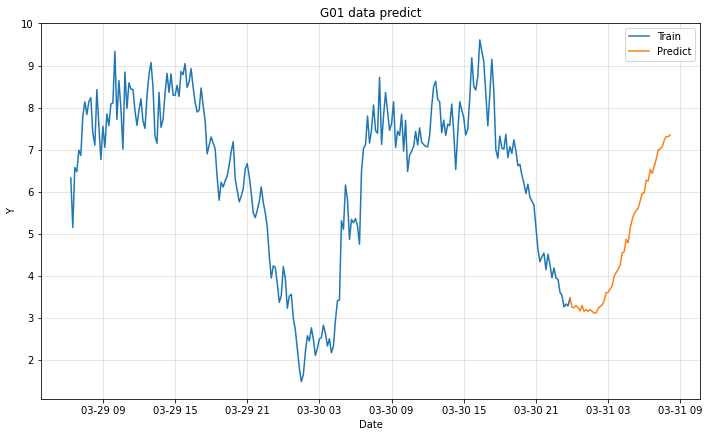

In [9]:
fost.plot(result)

# Save Pipeline

Save the pipeline to  `pipeline_path`

In [10]:
#save pipeline
pipeline_path = fost.save_pipeline()

# Predict with saved model

## Load Exist Pipeline

Load pipeline from  `pipeline_path`

In [11]:
#load exist pipeline
fost = Pipeline(lookahead=lookahead, load_path = pipeline_path)

2021-11-10 16:25:36 fostool/task/config_handler.py 26 \ - INFO - yaml handler load path: /home/xiaofan/anaconda3/envs/test/lib/python3.8/site-packages/fostool/config/default.yaml


## Predict

Predict with test_data, we will predict the `lookahead` 1000 minutes after the end-time point of the test data based on the test data and the previously trained model.

In [13]:
test_path  = 'FOST_example_data/Turbine/train.csv'
result = fost.predict(test_path=test_path )

2021-11-10 16:27:32 fostool/dataset/data_utils.py 426 \ - INFO - 118224 Rows Before Time Reindex.
2021-11-10 16:27:32 fostool/dataset/data_utils.py 428 \ - INFO - 118224 Rows After Time Reindex.
2021-11-10 16:27:32 fostool/dataset/data_utils.py 429 \ - INFO - --------------------
2021-11-10 16:27:32 fostool/dataset/data_utils.py 457 \ - INFO - 118224 Rows Before Fill Missing.
2021-11-10 16:27:35 fostool/dataset/data_utils.py 461 \ - INFO - 118224 Rows After Fill Missing.
2021-11-10 16:27:35 fostool/dataset/data_utils.py 462 \ - INFO - --------------------
2021-11-10 16:27:36 fostool/task/fusion.py 67 \ - INFO -    val_loss              model_name
1  0.065863      KRNNModel_cdbd_150
2  0.045265      KRNNModel_e28a_100
3  0.052497        MLP_Res_2ead_100
4  0.061707        MLP_Res_9815_150
6  0.074821   SandwichModel_9023_50
7  0.078380  SandwichModel_c2de_100
8  0.073879  SandwichModel_e96b_150


## Plot

Display of predicted data.

2021-11-10 16:27:40 fostool/visualizer/plot.py 66 \ - INFO - Unspecified lookback_size, use default lookback_size: 250.


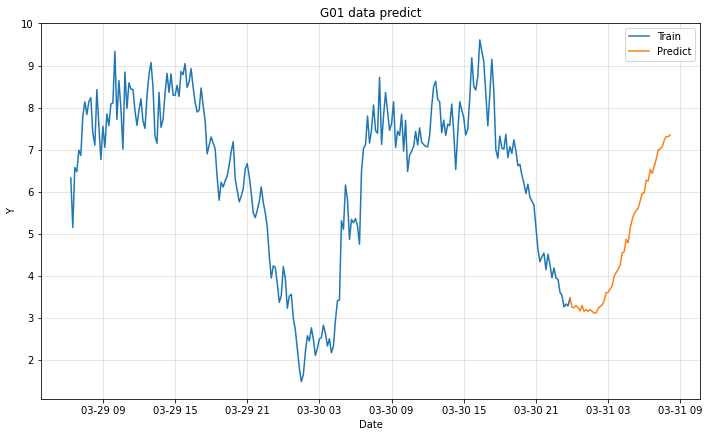

In [14]:
fost.plot(result)